# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('sinasc_RO_2019.csv', na_values=('NaN', 'na', ' ' ))

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

    APGAR5    APGAR5_cat
0     10.0        Normal
1      9.0        Normal
2     10.0        Normal
3     10.0        Normal
4     10.0        Normal
5     10.0        Normal
6     10.0        Normal
7     10.0        Normal
8      9.0        Normal
9     10.0        Normal
10     9.0        Normal
11    10.0        Normal
12     9.0        Normal
13     9.0        Normal
14     7.0  Asfixia Leve
15    10.0        Normal
16    10.0        Normal
17    10.0        Normal
18    10.0        Normal
19    10.0        Normal


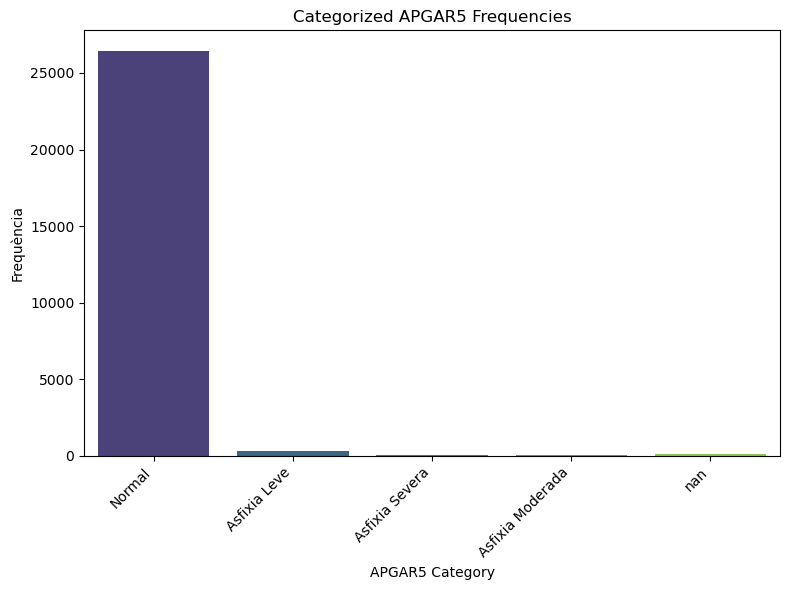

In [4]:
df.loc[df ['APGAR5'] >= 8, 'APGAR5_cat'] = 'Normal'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'APGAR5_cat'] = 'Asfixia Leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'APGAR5_cat'] = 'Asfixia Moderada'
df.loc[df['APGAR5'] <= 3, 'APGAR5_cat'] = 'Asfixia Severa'
print(df[['APGAR5','APGAR5_cat']].head(n=20))
plt.figure(figsize=(8, 6))
sns.countplot(x='APGAR5_cat', data=df, palette='viridis')
plt.title('Categorized APGAR5 Frequencies')
plt.xlabel('APGAR5 Category')
plt.ylabel('Frequència')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

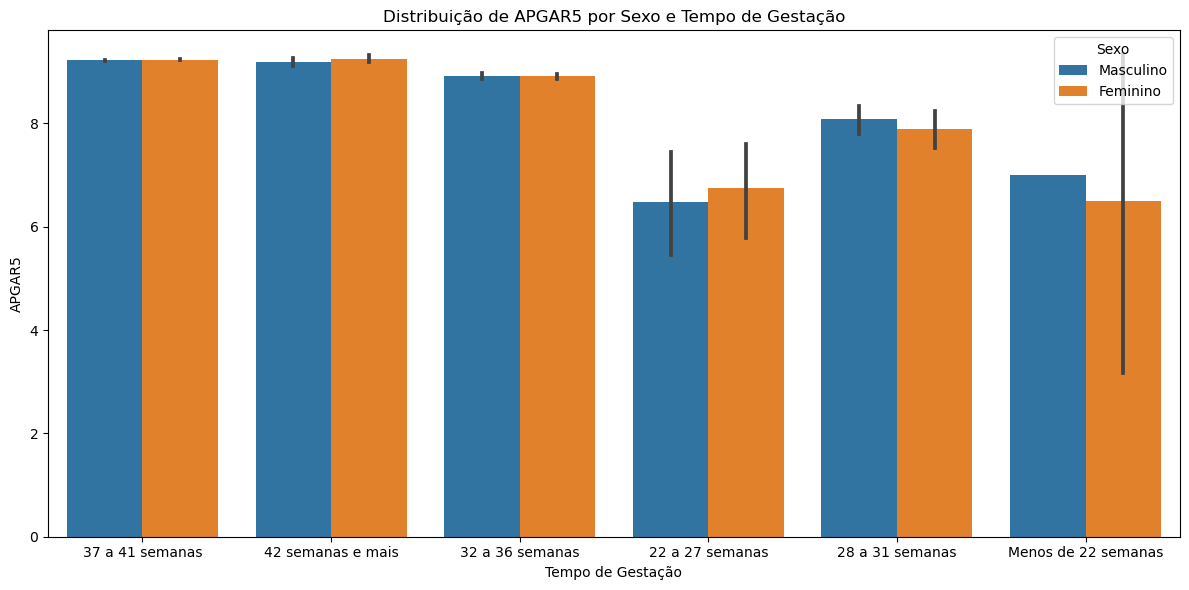

In [5]:
# Filtrando o DataFrame para remover valores NaN em 'GESTACAO'
df_filtered = df.dropna(subset=['GESTACAO'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='GESTACAO', y='APGAR5', hue='SEXO')
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
tac_cruzada_apgar5_gestacao = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])

tac_cruzada_apgar5_gestacao

APGAR5_cat,Asfixia Leve,Asfixia Moderada,Asfixia Severa,Normal,nan
GESTACAO,,,,,
22 a 27 semanas,12,1,21,51,1
28 a 31 semanas,18,12,3,129,3
32 a 36 semanas,73,19,8,2134,15
37 a 41 semanas,196,28,33,22266,66
42 semanas e mais,6,1,1,690,2
Menos de 22 semanas,1,0,2,4,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
df.dropna(subset=['GESTACAO', 'APGAR5_cat'], inplace=True)
tac_cruzada_apgar5_gestacao.sum(axis=1)
tac_cruzada_apgar5_gestacao_pctlin = tac_cruzada_apgar5_gestacao.div(tac_cruzada_apgar5_gestacao.sum(axis = 1), axis = 0)
print(tac_cruzada_apgar5_gestacao_pctlin.sum(axis = 1))
tac_cruzada_apgar5_gestacao_pctlin

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64


APGAR5_cat,Asfixia Leve,Asfixia Moderada,Asfixia Severa,Normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032677,0.008505,0.003581,0.955237
37 a 41 semanas,0.008702,0.001243,0.001465,0.988589
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

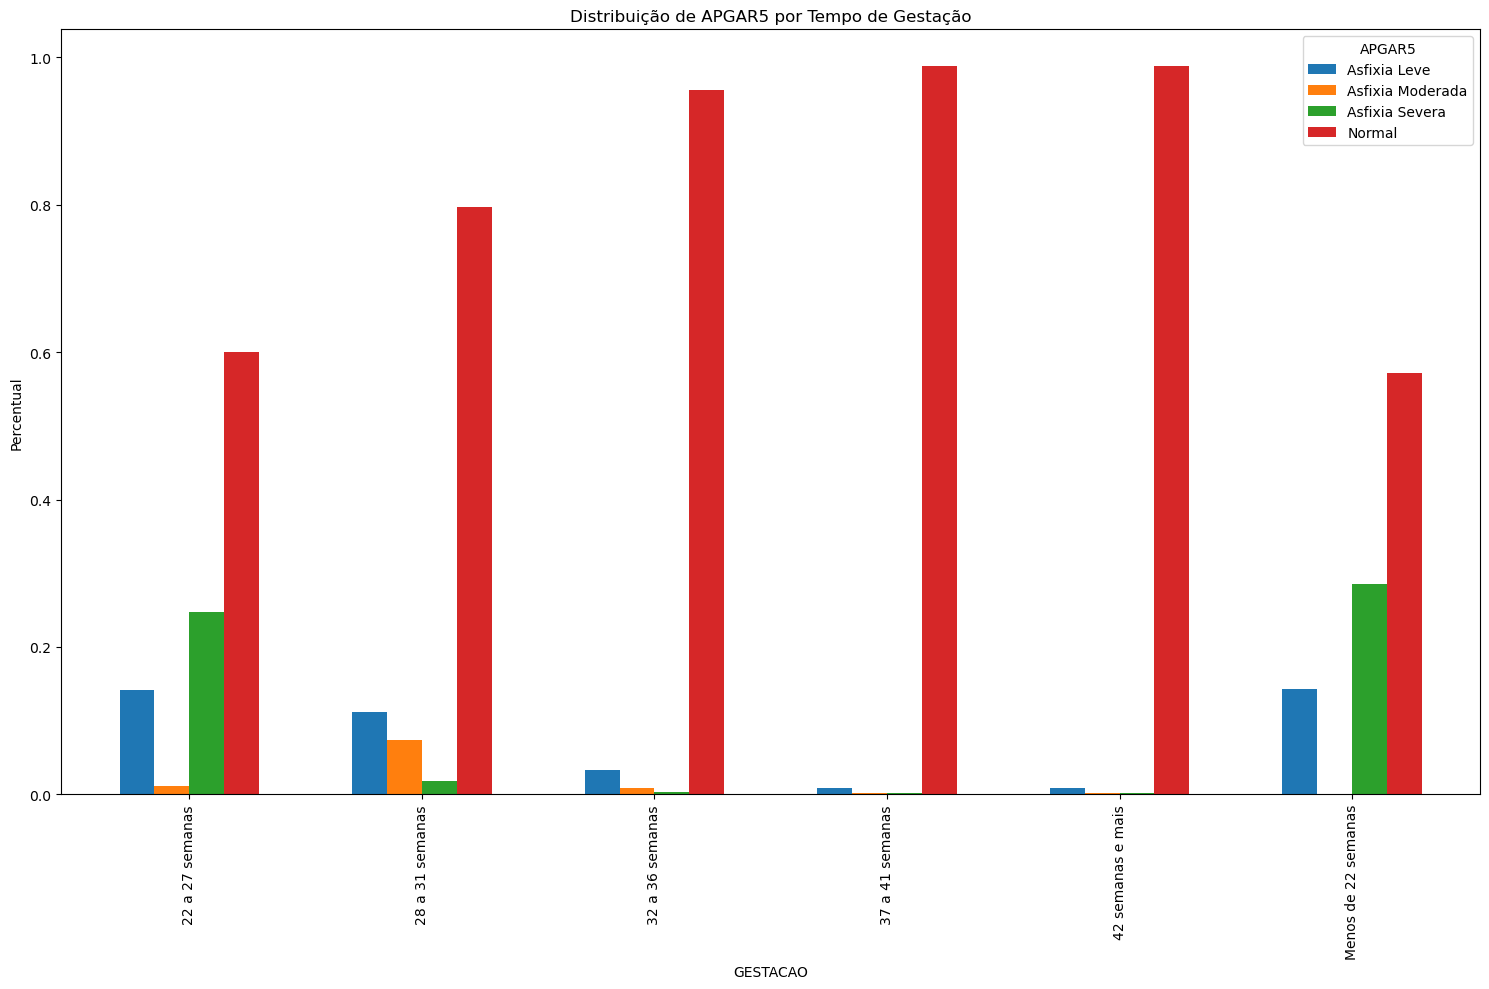

In [12]:
ax = tac_cruzada_apgar5_gestacao_pctlin.plot.bar(figsize=(15, 10), alpha=1.0, width=0.6)

plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('GESTACAO')
plt.ylabel('Percentual')
plt.legend(title='APGAR5', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

No gráfico acima, observa-se uma concentração significativa dos valores mais baixos de 'APGAR5' nos períodos de gestação mais curtos (inferiores a 37 semanas), com uma presença notável de casos de asfixia moderada e grave. Por outro lado, acima de 37 semanas de gestação, a incidência de valores de 'APGAR5' que indicam asfixia moderada ou grave é quase nula, proporcionalmente falando. Isso evidencia a importância do tempo de gestação para o nascimento saudável do bebê.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\raul_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raul_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

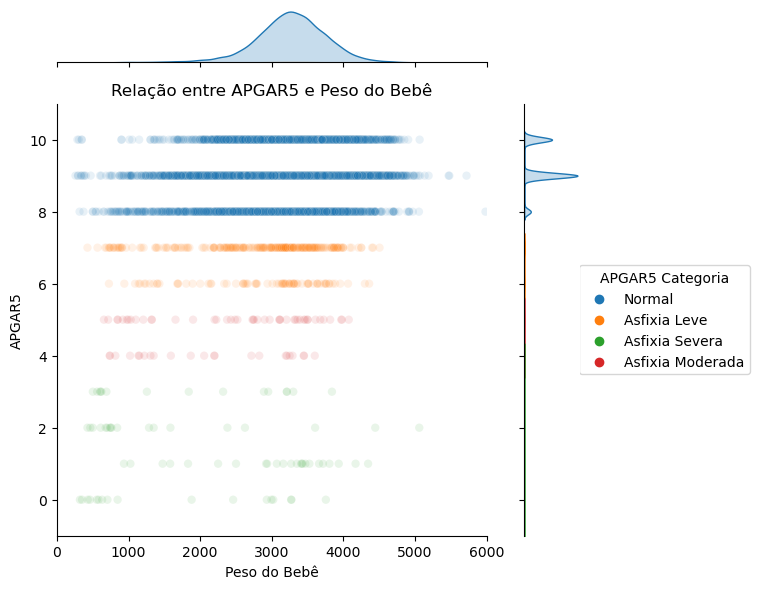

In [8]:
df_limpeza = df.dropna(subset=['APGAR5', 'PESO', 'APGAR5_cat'])
plt.figure(figsize=(10, 5))
sns_plot = sns.jointplot(x='PESO', y='APGAR5', hue='APGAR5_cat',  data=df_limpeza, alpha=0.1)
plt.xlim(0, 6000)
plt.ylim(-1, 11)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê')
plt.ylabel('APGAR5')
plt.tight_layout()

# Mover a legenda para fora do gráfico (lado direito) e ajustar a posição
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), title='APGAR5 Categoria')

# Mostrar o gráfico
plt.show()



O gráfico acima oferece uma visão geral da relação entre o 'APGAR5' e o peso do bebê, mostrando uma conexão sutil entre esses dois atributos. Ao analisar a curva gaussiana na parte superior do gráfico, nota-se uma baixa incidência de bebês com peso inferior a 2000g. No entanto, percebe-se que os 'APGAR5' mais baixos estão proporcionalmente mais concentrados nessa faixa de peso, evidenciado pela diferença de opacidade nas cores conforme os valores diminuem. Apesar dessas observações, para uma compreensão mais precisa dessa relação, seriam necessários dados quantitativos mais significativos. Concluímos que este gráfico não é suficiente para esclarecer completamente nossas dúvidas.

In [9]:
#Categorizando faixas de peso
df.loc[df['PESO'] < 1000, 'PESO_cat'] = 'Menos de 1000g'
df.loc[(df['PESO'] >= 1000) & (df['PESO'] <= 1500), 'PESO_cat'] = '1000g - 1500g'
df.loc[(df['PESO'] > 1500) & (df['PESO'] <= 2000), 'PESO_cat'] = '1500g - 2000g'
df.loc[(df['PESO'] > 2000) & (df['PESO'] <= 2500), 'PESO_cat'] = '2000g - 2500g'
df.loc[(df['PESO'] > 2500) & (df['PESO'] <= 3000), 'PESO_cat'] = '2500g - 3000g'
df.loc[(df['PESO'] > 3000) & (df['PESO'] <= 3500), 'PESO_cat'] = '3000g - 3500g'
df.loc[(df['PESO'] > 3500) & (df['PESO'] <= 4000), 'PESO_cat'] = '3500g - 4000g'
df.loc[(df['PESO'] > 4000) & (df['PESO'] <= 4500), 'PESO_cat'] = '4000g - 4500g'
df.loc[(df['PESO'] > 4500) & (df['PESO'] <= 5000), 'PESO_cat'] = '4500g - 5000g'
df.loc[df['PESO'] > 5000, 'PESO_cat'] = 'Mais de 5000g'

# Verificando se as categorias foram criadas corretamente
print(df['PESO_cat'].value_counts())



PESO_cat
3000g - 3500g     11407
3500g - 4000g      6597
2500g - 3000g      5553
4000g - 4500g      1350
2000g - 2500g      1230
1500g - 2000g       386
4500g - 5000g       185
1000g - 1500g       176
Menos de 1000g      132
Mais de 5000g        12
Name: count, dtype: int64


In [11]:
df.dropna(subset=['PESO_cat', 'APGAR5_cat'], inplace=True)

tac_cruzada_apgar5_peso = tac_cruzada_apgar5_peso.drop(columns=['nan'])

tac_cruzada_apgar5_peso

APGAR5_cat,Asfixia Leve,Asfixia Moderada,Asfixia Severa,Normal
PESO_cat,,,,
1000g - 1500g,19,11,5,136
1500g - 2000g,21,4,5,349
2000g - 2500g,38,8,5,1168
2500g - 3000g,51,9,7,5462
3000g - 3500g,92,18,14,11250
3500g - 4000g,66,7,8,6495
4000g - 4500g,10,1,3,1335
4500g - 5000g,1,0,0,184
Mais de 5000g,0,0,1,11


In [12]:
#porcentagem de incidencia de cada apgar em relação as faixas de peso
tac_cruzada_apgar5_peso.sum(axis=1)
tac_cruzada_apgar5_peso_pctlin = tac_cruzada_apgar5_peso.div(tac_cruzada_apgar5_peso.sum(axis = 1), axis = 0)
print(tac_cruzada_apgar5_peso_pctlin.sum(axis = 1))
tac_cruzada_apgar5_peso_pctlin

PESO_cat
1000g - 1500g     1.0
1500g - 2000g     1.0
2000g - 2500g     1.0
2500g - 3000g     1.0
3000g - 3500g     1.0
3500g - 4000g     1.0
4000g - 4500g     1.0
4500g - 5000g     1.0
Mais de 5000g     1.0
Menos de 1000g    1.0
dtype: float64


APGAR5_cat,Asfixia Leve,Asfixia Moderada,Asfixia Severa,Normal
PESO_cat,,,,
1000g - 1500g,0.111111,0.064327,0.029240,0.795322
1500g - 2000g,0.055409,0.010554,0.013193,0.920844
2000g - 2500g,0.031173,0.006563,0.004102,0.958162
2500g - 3000g,0.009224,0.001628,0.001266,0.987882
3000g - 3500g,0.008089,0.001583,0.001231,0.989098
3500g - 4000g,0.010036,0.001064,0.001217,0.987682
4000g - 4500g,0.007413,0.000741,0.002224,0.989622
4500g - 5000g,0.005405,0.000000,0.000000,0.994595
Mais de 5000g,0.000000,0.000000,0.083333,0.916667


Os dados na tabela acima são de grande interesse e estão em concordância com o último gráfico apresentado. Nota-se que as categorias de 'APGAR5' que indicam algum tipo de asfixia estão mais frequentes em bebês com pesos menores. Especialmente em bebês com menos de 1000g. Que têm quase 45% de chance de ter algum tipo de asfixia, sendo que cerca de 20% são casos graves. Na faixa de peso entre '1000g-1500g', aproximadamente 20% dos casos apresentam algum tipo de asfixia, principalmente de natureza leve, representando 11,11% desses casos. Em bebês com pesos entre 1500g e 2000g, a probabilidade de asfixia é inferior a 8%. 
Em contra partida, bebês muito pesados, com mais de 5000g, também podem apresentar algum tipo de asfixia, ocorrendo em pouco mais de 8% dos casos, todos sendo asfixia severa. Em outras palavras, bebês com mais de 5000g têm uma probabilidade de 8,33% de ter asfixia severa.
Na faixa de peso entre 2000g e 5000g, encontram-se os bebês mais saudáveis, com praticamente 98,5% de chance de não terem problemas relacionados ao 'APGAR5'. Destaca-se que na faixa de '4500g-5000g', mais de 99% dos bebês apresentaram um 'APGAR5' normal, e apenas uma pequena porcentagem teve apenas asfixia leve.

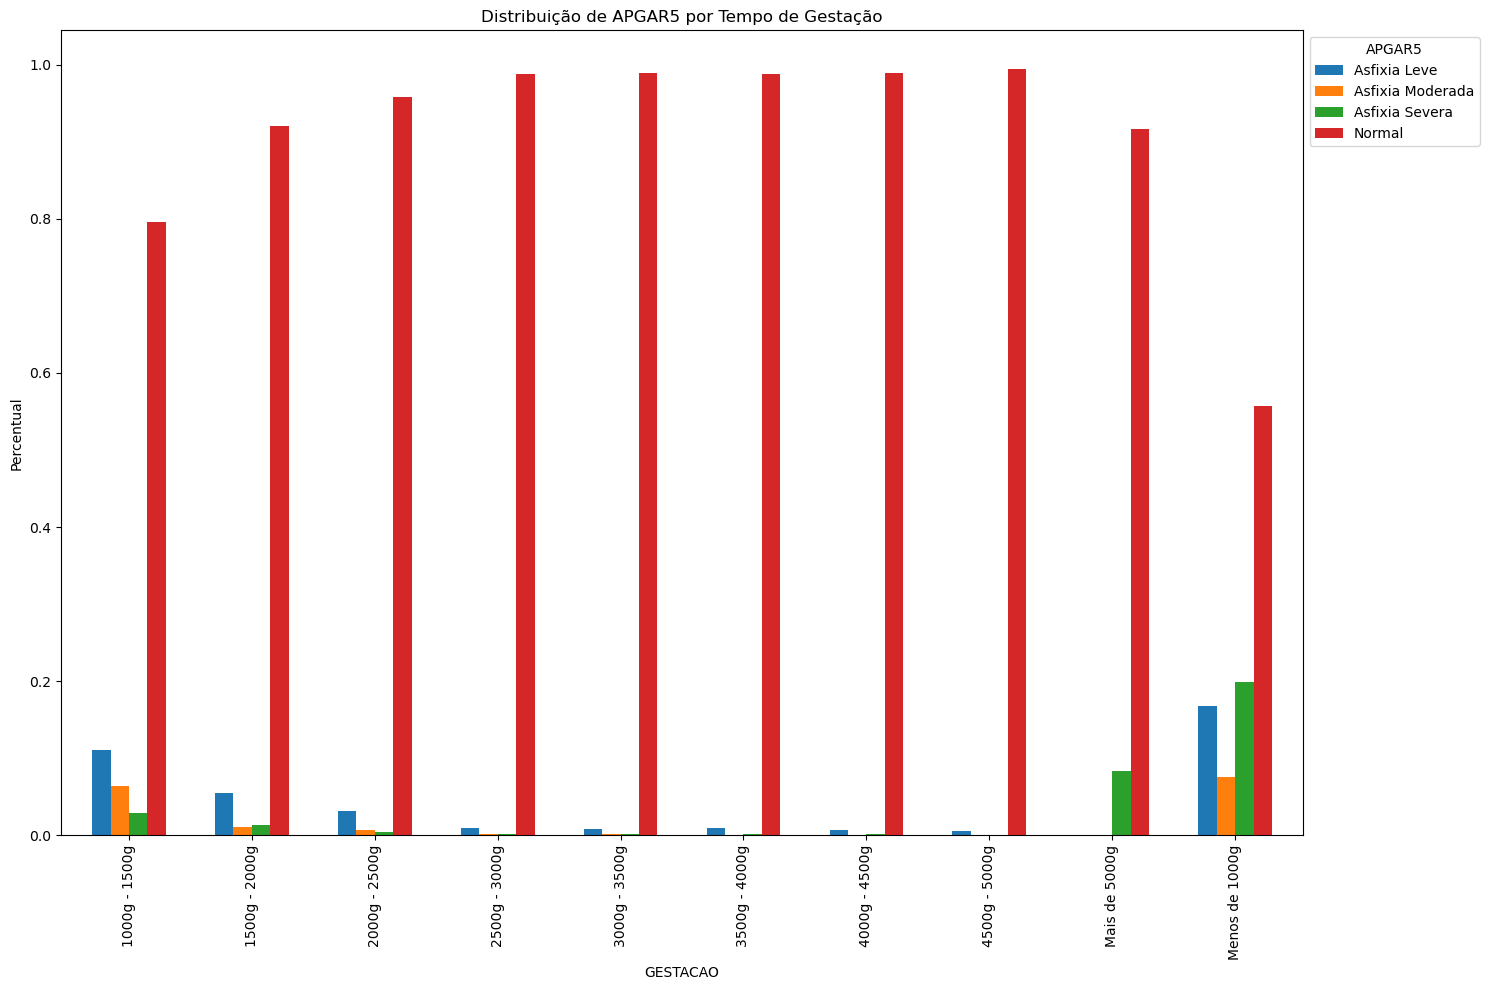

In [13]:
ax2 = tac_cruzada_apgar5_peso_pctlin.plot.bar(figsize=(15, 10), alpha=1.0, width=0.6)

plt.title('Distribuição de APGAR5 por Peso do bebê')
plt.xlabel('PESO')
plt.ylabel('Percentual')
plt.legend(title='APGAR5', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

O gráfico acima reforça o que foi dito na últma tabela . Agora temos uma demostração visual dos dados obtidos anteriormente. Com uma clareza de informação maior que o gráfico anterior.